# From text to map


### Creating new geometries from scratch (CAN BE SHORTER / REMOVED?)

Since geopandas takes advantage of Shapely geometric objects, it is possible to create spatial data from scratch by passing Shapely's geometric objects into the GeoDataFrame. This is useful as it makes it easy to convert e.g. a text file that contains coordinates into spatial data layers. 

Next we will see how to create a new GeoDataFrame from scratch and save it into a file. We will try this out by defining a geometry that represents the outlines of the [Senate square in Helsinki, Finland](https://fi.wikipedia.org/wiki/Senaatintori). The bounding box (min Longitude , min Latitude , max Longitude , max Latitude) for the Helsinki Senate square is `(24.950899, 60.169158, 24.953492, 60.170104)` .

Let's start by creating  a Shapely `Polygon` repsenting the Helsinki Senate square that we can later insert to our GeoDataFrame.

In [24]:
from shapely.geometry import Polygon
import geopandas as gpd

In [16]:
# Corner coordinates of the Helsinki Senate square in decimal degrees
coordinates = [(24.950899, 60.169158), (24.953492, 60.169158), (24.953510, 60.170104), (24.950958, 60.169990)]

In [17]:
# Create a Shapely polygon from the coordinate-tuple list
poly = Polygon(coordinates)

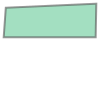

In [23]:
# Check the polyogon
poly

Let's then create a new empty `GeoDataFrame` object. A geodataframe is basically a pandas DataFrame that should have one column dedicated for geometries. By default, the geometry-column should be named `geometry`. The [GeoDataFrame constructor](https://geopandas.org/docs/reference/api/geopandas.GeoDataFrame.html#geopandas.GeoDataFrame) accepts same arguments as the [pandas DataFrame constructor](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) and a couple of additional ones.  We will want to have a column called `"geometry"` and we can already set the crs of this geodataframe at this stage. The `crs` accepts Coordinate Reference System information in various formats accepted by [pyproj CRS](https://pyproj4.github.io/pyproj/stable/api/crs/crs.html#pyproj.crs.CRS.from_user_input), for example, EPSG codes. We passed the coordinates as latitude and longitude decimal degrees, so the correct CRS is WGS84 (EPSG:4326).

In [11]:
newdata = gpd.GeoDataFrame(columns=["geometry"], crs=4326)

In [12]:
print(newdata)

Empty GeoDataFrame
Columns: [geometry]
Index: []


Now we have an empty GeoDataFrame with a column called `geometry`.
We can also check the crs definition of our data. The CRS information is necessary for creating a valid projection information for the output file. 

In [21]:
print(newdata.crs)

epsg:4326


Next, we need to insert the actual geometries. 

Let's insert the polygon into our 'geometry' column of our GeoDataFrame on the first row:

In [19]:
# Insert the polygon into 'geometry' -column at row 0
newdata.at[0, 'geometry'] = poly

In [20]:
# Let's see what we have now
print(newdata)

                                            geometry
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...


Great, now we have a GeoDataFrame with a Polygon geometry! This is already a valid spatial layer, but we can still add some attribute information in there. 

Let's add another column to our GeoDataFrame called `location` with text `Senaatintori` that describes the location of the feature.

In [13]:
# Add a new column and insert data 
newdata.at[0, 'location'] = 'Senaatintori'

# Let's check the data
print(newdata)

                                            geometry      location
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...  Senaatintori


Okay, now we have additional information that is useful for recognicing what the feature represents. 

In [25]:
# Save to file?

## Creating geometries from text


(INSERT EXAMPLE OF READIN TEXT COORDINATES FROM CSV USING PANDAS AND TURNING IT INTO A GEODATAFRAME)

## Geocoding

Geocoding is the process of transforming place names or addresses into coordinates.
In this lesson we will learn how to geocode addresses using Geopandas and
[geopy](https://geopy.readthedocs.io/en/stable/).

Geopy and other geocoding libaries (such as [geocoder](http://geocoder.readthedocs.io/))
make it easy to locate the coordinates of addresses, cities, countries, and landmarks
across the globe using web services ("geocoders"). In practice, geocoders are often
Application Programming Interfaces (APIs) where you can send requests, and receive responses in the form of place names, addresses and coordinates.

Geopy offers access to several geocoding services. Check the geopy documentation for more details about how to use each service via Python.

Geopandas has a function called `geocode()` that can geocode a list of addresses (strings) and return a GeoDataFrame containing the resulting point objects in ``geometry`` column. 



### Geocoding addresses

Let's try this out.

We will geocode addresses stored in a text file called `addresses.txt`. These addresses are located in the Helsinki Region in Southern Finland.

The first rows of the data look like this:

```
id;addr
1000;Itämerenkatu 14, 00101 Helsinki, Finland
1001;Kampinkuja 1, 00100 Helsinki, Finland
1002;Kaivokatu 8, 00101 Helsinki, Finland
1003;Hermannin rantatie 1, 00580 Helsinki, Finland
```

We have an `id` for each row and an address on column `addr`.

Let's first read the data into a Pandas DataFrame using the `read_csv()` -function:

In [1]:
# Import necessary modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Filepath
fp = r"data/addresses.txt"

# Read the data
data = pd.read_csv(fp, sep=';')

Let's check that we imported the file correctly:

In [2]:
len(data)

34

In [3]:
data.head()

,id,addr
0,1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


Now we have our data in a pandas DataFrame and we can geocode our addresses using the [geopandas geocoding function](http://geopandas.org/reference/geopandas.tools.geocode.html#geopandas-tools-geocode) that uses `geopy` package in the background. 

- Let's import the geocoding function and geocode the addresses (column `addr`) using Nominatim. 
- Remember to provide a custom string (name of your application) in the `user_agent` parameter.
- If needed, you can add the `timeout`-parameter which specifies how many seconds we will wait for a response from the service.

In [4]:
# Import the geocoding tool
from geopandas.tools import geocode

# Geocode addresses using Nominatim. Remember to provide a custom "application name" in the user_agent parameter!
geo = geocode(data['addr'], provider='nominatim', user_agent='autogis_xx', timeout=4)

In [5]:
geo.head()

,geometry,address
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns..."
1,POINT (24.93169 60.16902),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp..."
2,POINT (24.94179 60.16989),"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust..."
3,POINT (24.97783 60.18892),"Hermannin rantatie, Verkkosaari, Kalasatama, S..."
4,POINT (24.92160 60.15665),"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län..."


And Voilà! As a result we have a GeoDataFrame that contains our original
address and a 'geometry' column containing Shapely Point -objects that
we can use for exporting the addresses to a Shapefile for example.
However, the ``id`` column is not there. Thus, we need to join the
information from ``data`` into our new GeoDataFrame ``geo``, thus making
a **Table Join**.

<div class="alert alert-info">

**Rate-limiting**

When geocoding a large dataframe, you might encounter an error when geocoding. In case you get a time out error, try first using the `timeout` parameter as we did above (allow the service a bit more time to respond). In case of Too Many Requests error, you have hit the rate-limit of the service, and you should slow down your requests. To our convenience, geopy provides additional tools for taking into account rate limits in geocoding services. This script adapts the usage of [geopy RateLimiter](https://geopy.readthedocs.io/en/stable/#geopy.extra.rate_limiter.RateLimiter) to our input data:

```
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from shapely.geometry import Point

# Initiate geocoder
geolocator = Nominatim(user_agent='autogis_xx')

# Create a geopy rate limiter:
geocode_with_delay = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Apply the geocoder with delay using the rate limiter:
data['temp'] = data['addr'].apply(geocode_with_delay)

# Get point coordinates from the GeoPy location object on each row:
data["coords"] = data['temp'].apply(lambda loc: tuple(loc.point) if loc else None)

# Create shapely point objects to geometry column:
data["geometry"] = data["coords"].apply(Point)
```
All in all, remember that Nominatim is not meant for super heavy use. 
</div>


## Table join (TODO: REMOVE TABLE JOIN FROM HERE!)

<div class="alert alert-info">

**Table joins in pandas**
    
For a comprehensive overview of different ways of combining DataFrames and Series based on set theory, have a look at pandas documentation about [merge, join and concatenate](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html).


</div>


Joining data between two or several tables is a common task in many (spatial) data analysis workflows. As you might remember from our earlier lessons, combining data from different tables based on common
**key** attribute can be done easily in pandas/geopandas using the [merge()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) -function. We used this approach in the geo-python course [exercise 6](https://geo-python-site.readthedocs.io/en/latest/lessons/L6/exercise-6.html#joining-data-from-one-dataframe-to-another).

However, sometimes it is useful to join two tables together based on the **index** of those DataFrames. In such case, we assume
that there is **same number of records** in our DataFrames and that the **order of the records should be the same** in both DataFrames.

We can use this approach to join information from the original data to our geocoded addresses row-by-row 
``join()`` -function which merges the two DataFrames together
based on index by default. This approach works correctly because the order of the geocoded addresses in ``geo`` DataFrame is the same as in our original ``data`` DataFrame.

In [6]:
join = geo.join(data)
join.head()

,geometry,address,id,addr
0,POINT (24.91556 60.16320),"Ruoholahti, 14, Itämerenkatu, Ruoholahti, Läns...",1000,"Itämerenkatu 14, 00101 Helsinki, Finland"
1,POINT (24.93169 60.16902),"Kamppi, 1, Kampinkuja, Kamppi, Eteläinen suurp...",1001,"Kampinkuja 1, 00100 Helsinki, Finland"
2,POINT (24.94179 60.16989),"Kauppakeskus Citycenter, 8, Kaivokatu, Keskust...",1002,"Kaivokatu 8, 00101 Helsinki, Finland"
3,POINT (24.97783 60.18892),"Hermannin rantatie, Verkkosaari, Kalasatama, S...",1003,"Hermannin rantatie 1, 00580 Helsinki, Finland"
4,POINT (24.92160 60.15665),"Hesburger, 9, Tyynenmerenkatu, Jätkäsaari, Län...",1005,"Tyynenmerenkatu 9, 00220 Helsinki, Finland"


Let's also check the data type of our new ``join`` table.

In [7]:
type(join)

geopandas.geodataframe.GeoDataFrame

As a result we have a new GeoDataFrame called ``join`` where we now have
all original columns plus a new column for ``geometry``. **Note!** If you would do the join the other way around, i.e. `data.join(geo)`, the output would be a pandas DataFrame, not a GeoDataFrame!



Now it is easy to save our address points into a Shapefile

In [8]:
# Output file path
outfp = r"data/addresses.shp"

# Save to Shapefile
join.to_file(outfp)

That's it. Now we have successfully geocoded those addresses into Points
and made a Shapefile out of them. Easy isn't it!

Nominatim works relatively nicely if you have well defined and well-known addresses such as the ones that we used in this tutorial. In practice, the address needs to exist in the OpenStreetMap database. Sometimes, however, you might want to geocode a "point-of-interest", such as a museum, only based on it's name. If the museum name is not on OpenStreetMap, Nominatim won't provide any results for it, but you might be able to geocode the place using some other geocoder.